### What is a dense neural network?
A dense layer is a fully connected layer where all the neurons in a layer are connected to the ones in the next layer.



## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## Data Set

In [19]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
print("Train images shape:",train_images.shape)
print("Train labels length:",len(train_labels))
train_labels

Train images shape: (60000, 28, 28)
Train labels length: 60000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
print("Test images shape:",test_images.shape)
print("Test labels length:",len(test_labels))


Test images shape: (10000, 28, 28)
Test labels length: 10000


## Preprocessing

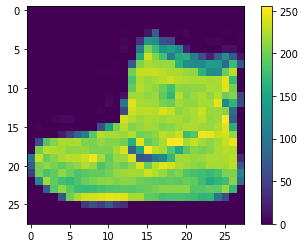

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

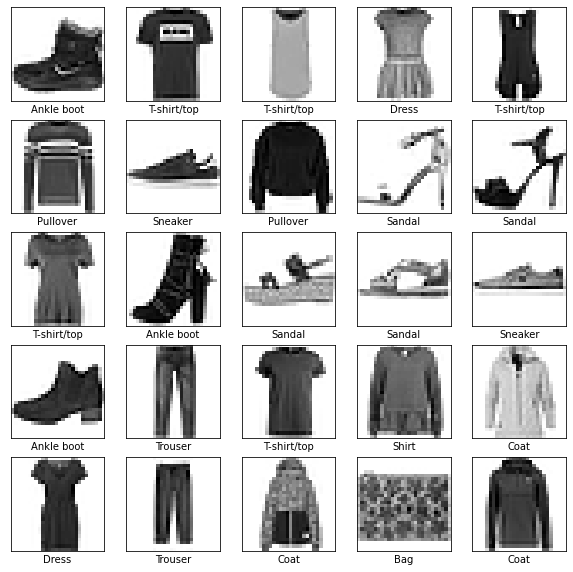

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.4996 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.3701 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.3322 - accuracy: 0.87960s
Epoch 4/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.3105 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.2940 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.2792 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.2676 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.2550 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2485 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 2s 86

## Accuracy

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3438 - accuracy: 0.8782

Test accuracy: 0.8781999945640564


Credits: [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)